# 問題90

In [6]:
%%bash
module purge 
module load python/3.8.3
module load intel cuda openmpi
module load gcc/8.3.0

In [ ]:
%%bash
python3 -m pip install --upgrade pip

In [3]:
drive_ch10="/home/8/17B07865/t3workspace/100nock/ch10"

## 日本語の形態素解析

In [ ]:
%%bash
python3 -m pip install --user wheel
python3 -m pip install --user ginza

In [19]:
!echo $PATH

/apps/t3/sles12sp2/free/gcc/8.3.0/bin:/apps/t3/sles12sp4/free/openmpi/3.1.4-opa10.10.0.0.445/intel19.1/cuda10.2/bin:/apps/t3/sles12sp2/cuda/10.2.89/bin:/apps/t3/sles12sp2/isv/intel/compilers_and_libraries_2020.0.166/linux/bin/intel64:/apps/t3/sles12sp4/free/python/3.8.3/gcc4.8.5/bin:/apps/t3/sles12sp2/uge/latest/bin/lx-amd64:/apps/t3/sles12sp4/free/jupyterlab/2.1.0/gcc4.8.5/bin:/scr/7680331.1.interactive:/usr/local/bin:/bin:/usr/bin


In [15]:
!pip list --user

Package            Version
------------------ ---------
argon2-cffi        20.1.0
attrs              19.3.0
backcall           0.2.0
bleach             3.1.5
cffi               1.14.1
Cython             0.29.21
decorator          4.4.2
defusedxml         0.6.0
entrypoints        0.3
fairseq            0.9.0
future             0.18.2
ipykernel          5.3.4
ipython            7.17.0
ipython-genutils   0.2.0
ipywidgets         7.5.1
jedi               0.17.2
Jinja2             2.11.2
jsonschema         3.2.0
jupyter            1.0.0
jupyter-client     6.1.6
jupyter-console    6.1.0
jupyter-core       4.6.3
MarkupSafe         1.1.1
mecab-python3      0.996.5
mistune            0.8.4
nbconvert          5.6.1
nbformat           5.0.7
notebook           6.1.1
numpy              1.19.1
packaging          20.4
pandocfilters      1.4.2
parso              0.7.1
pexpect            4.8.0
pickleshare        0.7.5
pip                20.2
portalocker        1.7.1
prometheus-client  0.8.0
prompt-tool

In [16]:
!fairseq-preprocess

/bin/sh: fairseq-preprocess: command not found


In [10]:
! cat "{drive_ch10+'/orig/kyoto-train.ja'}" | sed 's/\s+/ /g' | /home/8/17B07865/.local/bin/ginzame > "{drive_ch10+'/train.ginza.ja'}"

In [11]:
! cat "{drive_ch10+'/orig/kyoto-dev.ja'}" | sed 's/\s+/ /g' | /home/8/17B07865/.local/bin/ginzame > "{drive_ch10+'/dev.ginza.ja'}"

In [12]:
! cat "{drive_ch10+'/orig/kyoto-test.ja'}" | sed 's/\s+/ /g' | /home/8/17B07865/.local/bin/ginzame > "{drive_ch10+'/test.ginza.ja'}"

In [13]:
! head "{drive_ch10+'/train.ginza.ja'}"

雪舟	名詞,固有名詞,人名,一般,*,*,雪舟,セッシュウ,*
（	補助記号,括弧開,*,*,*,*,（,キゴウ,*
せっ	名詞,固有名詞,人名,一般,*,*,せっ,セッ,*
しゅう	名詞,固有名詞,人名,名,*,*,しゅう,シュウ,*
、	補助記号,読点,*,*,*,*,、,、,*
1420	名詞,数詞,*,*,*,*,1420,イチヨンニレイ,*
年	名詞,普通名詞,助数詞可能,*,*,*,年,ネン,*
（	補助記号,括弧開,*,*,*,*,（,キゴウ,*
応永	名詞,固有名詞,一般,*,*,*,応永,オウエイ,*
27	名詞,数詞,*,*,*,*,27,ニシチ,*


## 形態素にする

In [14]:
def morpheme_ja(input_file, output_file):
  with open(output_file,"w") as f:
    f.write("")
  with open(input_file,"r") as input_f,open(output_file,mode="a") as output_f:
    output_sentence=""
    line=input_f.readline()
    while line:
      if line.strip()=="EOS":
        output_f.write(output_sentence)
        output_sentence=""
      else:
        output_sentence+=line.split("\t")[0]+" "
      line=input_f.readline()

In [15]:
morpheme_ja(drive_ch10+"/train.ginza.ja",drive_ch10+"/train_spacy.ja")
morpheme_ja(drive_ch10+"/dev.ginza.ja",drive_ch10+"/dev_spacy.ja")
morpheme_ja(drive_ch10+"/test.ginza.ja",drive_ch10+"/test_spacy.ja")

In [16]:
! head "{drive_ch10+'/train_spacy.ja'}"

雪舟 （ せっ しゅう 、 1420 年 （ 応永 27 年 ） - 1506 年 （ 永正 3 年 ） ） は 号 で 、 15 世紀 後半 室町 時代 に 活躍 し た 水墨 画家 ・ 禅僧 で 、 画聖 と も 称え られる 。 
 日本 の 水墨画 を 一変 さ せ た 。 
 諱 は 「 等楊 （ とう よう ） 」 、 もしくは 「 拙 宗 （ せっ しゅう ） 」 と 号し た 。 
 備中 国 に 生まれ 、 京都 ・ 相国 寺 に 入っ て から 周防 国 に 移る 。 
 その 後 遣明 使 に 随行 し て 中国 （ 明 ） に 渡っ て 中国 の 水墨画 を 学ん だ 。 
 作品 は 数多く 、 中国 風 の 山水画 だけ で なく 人物画 や 花鳥画 も よく し た 。 
 大胆 な 構図 と 力強い 筆線 は 非常 に 個性的 な 画風 を 作り出し て いる 。 
 現存 する 作品 の うち 6 点 が 国宝 に 指定 さ れ て おり 、 日本 の 画家 の なか で も 別格 の 評価 を 受け て いる と いえる 。 
 この ため 、 花鳥 図 屏風 など に 「 伝 雪舟 筆 」 さ れる 作品 は 大変 多い 。 
 真筆 で ある か 専門家 の 間 で も 意見 の 分かれる もの も 多々 ある 。 


## 英語の単語分割

In [26]:
%%bash
python3 -m spacy download en

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=3d9ea3e5ba31be31b639106af6dfa58e03ebf0a6169dd6ec968227aa6a7fab8d
  Stored in directory: /scr/7608103.1.interactive/pip-ephem-wheel-cache-tzxuygv4/wheels/10/6f/a6/ddd8204ceecdedddea923f8514e13afb0c1f0f556d2c9c3da0
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/8/17B07865/.local/lib/python3.6/site-packages/en_core_web_sm -->
/home/8/17B07865/.local/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [28]:
import spacy

In [29]:
nlp=spacy.load('en')
words=nlp.make_doc("I am Shimokawa")
for word in words:
  print(word)
for word in words:
  print(word.lemma_)
for word in words:
  print(word.lemma_.lower())
for word in words:
  print(word.text)

I
am
Shimokawa
I
be
Shimokawa
i
be
shimokawa
I
am
Shimokawa


In [30]:
def spacy_file(input_file, output_file):
  with open(output_file,"w") as f:
    f.write("")
  with open(input_file,"r") as input_f,open(output_file,mode="a") as output_f:
    nlp=spacy.load('en')
    line=input_f.readline()
    while line:
      spacy_line=nlp.make_doc(line.strip())
      output_sentence=" ".join([word.text for word in spacy_line])+"\n"
      output_f.write(output_sentence)
      line=input_f.readline()
      

In [31]:
spacy_file(drive_ch10+"/orig/kyoto-train.en",drive_ch10+"/train_spacy.en")
spacy_file(drive_ch10+"/orig/kyoto-dev.en",drive_ch10+"/dev_spacy.en")
spacy_file(drive_ch10+"/orig/kyoto-test.en",drive_ch10+"/test_spacy.en")

In [32]:
! head "{drive_ch10+'/train_spacy.en'}"

Known as Sesshu ( 1420 - 1506 ) , he was an ink painter and Zen monk active in the Muromachi period in the latter half of the 15th century , and was called a master painter .
He revolutionized the Japanese ink painting .
He was given the posthumous name " Toyo " or " Sesshu ( 拙宗 ) . "
Born in Bicchu Province , he moved to Suo Province after entering SShokoku - ji Temple in Kyoto .
Later he accompanied a mission to Ming Dynasty China and learned Chinese ink painting .
His works were many , including not only Chinese - style landscape paintings , but also portraits and pictures of flowers and birds .
His bold compositions and strong brush strokes constituted an extremely distinctive style .
6 of his extant works are designated national treasures . Indeed , he is considered to be extraordinary among Japanese painters .
For this reason , there are a great many artworks that are attributed to him , such as folding screens with pictures of flowers and that birds are painted on them .
There a

# 問題91

In [8]:
from t3jpttools import create_kernel
create_kernel('100nock_ch10','python/3.8.3 intel cuda openmpi gcc/8.3.0')

finished : The kernel is ready.


In [9]:
from t3jpttools import list_kernel, delete_kernel, create_kernel
list_kernel()

Available kernels:
------------------------------
100nock_ch10
python3
------------------------------
finished : Listed kernels.


前処理

!fairseq-preprocess --source-lang ja --target-lang en --trainpref train_spacy --validpref dev_spacy --destdir myfairseq --thresholdsrc 5 --thresholdtgt 5 --workers 10

訓練

!fairseq-train myfairseq --fp16 --save-dir fseq_save --max-epoch 10 --no-epoch-checkpoints --arch transformer --share-decoder-input-output-embed --optimizer adam --clip-norm 1.0 --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 --update-freq 1 --dropout 0.2 --weight-decay 0.0001 --criterion label_smoothed_cross_entropy --label-smoothing 0.1 --max-tokens 8000 > fairseq_learning.log

# 問題92

fairseq-interactive --path fseq_save/checkpoint_best.pt myfairseq < test_spacy.ja | grep '^H' | cut -f3 > test.out

In [1]:
!head test.out

<unk> ( <unk> )
Ejo ( <unk> ) was a priest in the Kamakura period .
He was the founder of the Soto sect .
It is also called <unk> or <unk> .
It is also called <unk> .
His posthumous Buddhist name was <unk> .
His common name was <unk> .
In Japan , there is a custom in which a person who has a meal with a cup of sake ( Japanese liquor ) and a cup of sake ( Japanese liquor ) .
It is said that the origin of the word ' <unk> ' ( <unk> ) was <unk> ( <unk> ) .
His father was MINAMOTO no Michichika , who was a member of the Sekkan - ke ( the families which produced regents ) , and his mother was unknown .


# 問題93

fairseq-score --sys test.out --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='test.out')
BLEU4 = 4.11, 33.2/8.0/2.9/1.4 (BP=0.712, ratio=0.746, syslen=20623, reflen=27628)

# 問題94

以下をターミナルで実行

In [ ]:
for N in `seq 1 20` ; do
    fairseq-interactive --path fseq_save/checkpoint_best.pt --beam $N myfairseq < test_spacy.ja | grep '^H' | cut -f3 > 94.$N.out
done

In [ ]:
for N in `seq 1 20` ; do
    fairseq-score --sys 94.$N.out --ref test_spacy.en > 94.$N.score
done

In [ ]:
import matplotlib as plt
import re

In [ ]:
def read_score(filename):
    with open(filename) as f:
        x = f.readlines()[1]
        x = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', x)
        return float(x.group())

xs = range(1, 21)
ys = [read_score(f'94.{x}.score') for x in xs]
fig = plt.figure()
plt.plot(xs, ys)
fig.savefig("94.png")

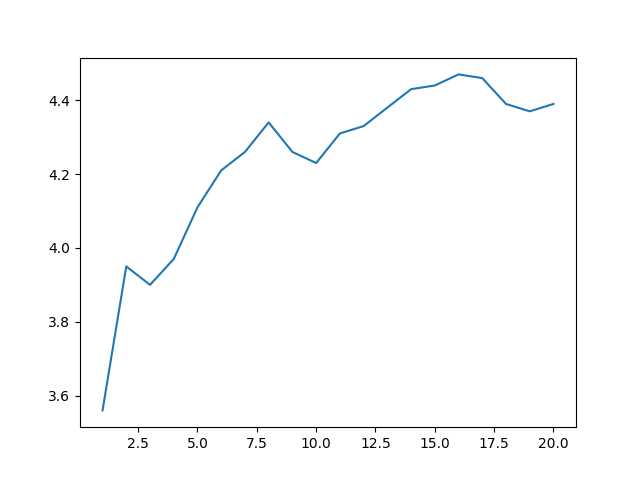

In [8]:
from IPython.display import Image
Image("94.png")

## 問題95

In [ ]:
import sentencepiece as spm

In [ ]:
spm.SentencePieceTrainer.Train('--input=kyoto-train.ja --model_prefix=kyoto_ja --vocab_size=16000 --character_coverage=1.0')

In [ ]:
sp = spm.SentencePieceProcessor()
sp.Load('kyoto_ja.model')

In [ ]:
for src, dst in [
    ('orig/kyoto-train.ja', 'train.sub.ja'),
    ('orig/kyoto-dev.ja', 'dev.sub.ja'),
    ('orig/kyoto-test.ja', 'test.sub.ja'),
]:
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = re.sub(r'\s+', ' ', x)
            x = sp.encode_as_pieces(x)
            x = ' '.join(x)
            print(x, file=g)

In [9]:
! head train.sub.ja

▁ 雪 舟 ( せ っ しゅう 、 14 20 年 ( 応永 27 年 )- 150 6 年 ( 永正 3 年 ) ) は 号 で 、 15 世紀後半 室町時代に 活躍した 水墨画 家 ・ 禅僧 で 、 画 聖 とも 称え られる 。
▁日本の 水墨画 を 一 変 させた 。
▁諱は 「 等 楊 ( とう よう ) 」 、 もしくは 「 拙 宗 ( せ っ しゅう ) 」 と号した 。
▁ 備中国 に 生まれ 、 京都 ・ 相国寺 に入って から 周防国 に移る 。
▁その後 遣 明 使 に 随行 して 中国 ( 明 ) に渡って 中国の 水墨画 を学んだ 。
▁ 作品 は 数多く 、 中国 風の 山 水 画 だけでなく 人物 画 や 花鳥 画 も よく した 。
▁大 胆 な 構図 と 力 強い 筆 線 は非常に 個 性 的な 画 風 を作り 出している 。
▁ 現存する 作品 のうち 6 点 が 国宝 に指定され ており 、 日本の 画家 のなかで も 別 格 の 評価 を受けている といえる 。
▁このため 、 花鳥 図屏風 などに 「 伝 雪 舟 筆 」 される 作品 は 大変 多い 。
▁ 真 筆 である か 専門 家 の間で も 意見 の 分かれ るもの も 多 々 ある 。


subword-nmt learn-bpe -s 16000 < orig/kyoto-train.en > kyoto_en.codes

! subword-nmt apply-bpe -c kyoto_en.codes < orig/kyoto-train.en > train_sub.en
! subword-nmt apply-bpe -c kyoto_en.codes < orig/kyoto-dev.en > dev_sub.en
! subword-nmt apply-bpe -c kyoto_en.codes < orig/kyoto-test.en > test_sub.en

In [10]:
! head train.sub.en

K@@ n@@ own as Ses@@ shu (14@@ 20 - 150@@ 6@@ ), he was an ink painter and Zen monk active in the Muromachi period in the latter half of the 15th century, and was called a master pain@@ ter.
He revol@@ ut@@ ion@@ ized the Japanese ink paint@@ ing.
He was given the posthumous name "@@ Toyo@@ " or "S@@ es@@ shu (@@ 拙@@ 宗@@ )."
Born in Bicchu Province, he moved to Suo Province after entering S@@ Shokoku-ji Temple in Kyoto.
Later he accompanied a mission to Ming Dynasty China and learned Chinese ink paint@@ ing.
His works were man@@ y, including not only Chinese-style landscape paintings, but also portraits and pictures of flowers and bird@@ s.
His b@@ old compos@@ itions and strong brush st@@ rok@@ es const@@ ituted an extremely distinctive style.
6 of his ext@@ ant works are designated national treasu@@ res. In@@ de@@ ed, he is considered to be extraordinary among Japanese pain@@ ters.
For this reason, there are a great many art@@ works that are attributed to him, such as folding scre@@ 

前処理

!fairseq-preprocess -s ja -t en \
    --trainpref train.sub \
    --validpref dev.sub \
    --destdir data95  \
    --workers 20

訓練

!fairseq-train data95 \
    --fp16 \
    --save-dir save95 \
    --max-epoch 10 \
    --no-epoch-checkpoints \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --update-freq 1 \
    --dropout 0.2 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 95.log

翻訳

In [ ]:
!fairseq-interactive --path save95/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 95.out

In [12]:
!head -n 100 95.out

Brief biography
The sango (literally, "mountain name"), which is the title prefixed to the name of a Buddhist temple)
Its sango (literally, "mountain name"), which is the title prefixed to the name of a Buddhist temple) is Daizan.
It is said that he was born in the same year.
It is also said that he was a descendant of Prince Shotoku.
The sango (literally, "mountain name"), which is the title prefixed to the name of a Buddhist temple)
Its sango (literally, "mountain name"), which is the title prefixed to the name of a Buddhist temple, is Daizan.
It is said that this is the origin of the name of the station.
It is said that he was born in Kyoto.
It is said that he was a close aide to the Emperor Godaigo.
It is said that he was born in Kyoto.
It is said that he was the father of MINAMOTO no Tameyoshi.
It is said that he was born in Kyoto.
It is said that he was a close aide to the Emperor Godaigo.
It is said that this is the origin of the name of the temple.
It is said that he was one of

In [ ]:
def spacy_tokenize(src, dst):
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = ' '.join([doc.text for doc in nlp(x)])
            print(x, file=g)
spacy_tokenize('95.out', '95.out.spacy')

In [ ]:
!fairseq-score --sys 95.out.spacy --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='95.out.spacy')
BLEU4 = 0.92, 26.4/3.7/0.9/0.4 (BP=0.379, ratio=0.508, syslen=14023, reflen=27628)

In [ ]:
xs = range(1, 11)
ys = [read_score(f'95.{x}.score') for x in xs]
fig = plt.figure()
plt.plot(xs, ys)
fig.savefig("95.png")

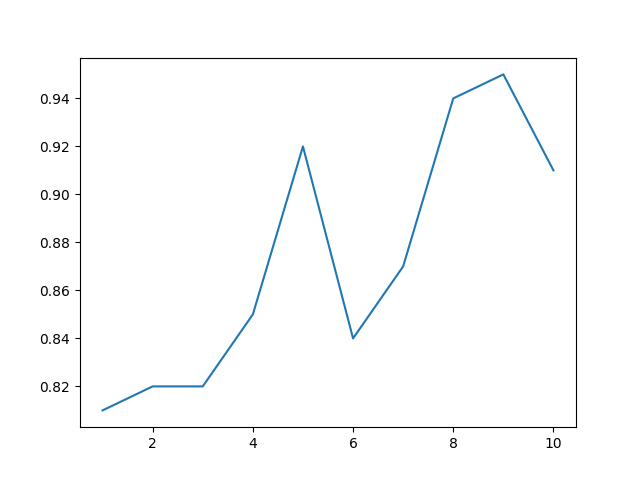

In [1]:
from IPython.display import Image
Image("95.png")

# 問題96

In [ ]:
fairseq-train data95 \
    --fp16 \
    --tensorboard-logdir log96 \
    --save-dir save96 \
    --max-epoch 5 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.2 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 96.log

# 問題97

ドロップアウト

In [ ]:
fairseq-train data95 \
    --fp16 \
    --save-dir save97_1 \
    --max-epoch 3 \
    --no-epoch-checkpoints \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --update-freq 1 \
    --dropout 0.1 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_1.log

In [ ]:
fairseq-train data95 \
    --fp16 \
    --save-dir save97_3 \
    --max-epoch 3 \
    --no-epoch-checkpoints \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --update-freq 1 \
    --dropout 0.3 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_3.log

In [ ]:
fairseq-train data95 \
    --fp16 \
    --save-dir save97_5 \
    --max-epoch 3 \
    --no-epoch-checkpoints \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --update-freq 1 \
    --dropout 0.5 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_5.log

In [ ]:
fairseq-interactive --path save97_1/checkpoint_best.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_1.out
fairseq-interactive --path save97_3/checkpoint_best.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_3.out
fairseq-interactive --path save97_5/checkpoint_best.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_5.out

fairseq-score --sys 97_1.out.spacy --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='97_1.out.spacy')
BLEU4 = 1.87, 21.3/3.3/0.9/0.4 (BP=0.816, ratio=0.831, syslen=22958, reflen=27628)

fairseq-score --sys 97_3.out.spacy --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='97_3.out.spacy')
BLEU4 = 1.05, 19.2/2.3/0.5/0.2 (BP=0.733, ratio=0.763, syslen=21071, reflen=27628)

fairseq-score --sys 97_5.out.spacy --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='97_5.out.spacy')
BLEU4 = 0.40, 17.1/1.9/0.1/0.0 (BP=0.724, ratio=0.756, syslen=20880, reflen=27628)

学習率

fairseq-train data95 \
    --fp16 \
    --save-dir save97a \
    --no-epoch-checkpoints \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97a.log

fairseq-train data95 \
    --fp16 \
    --save-dir save97a \
    --no-epoch-checkpoints \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 2e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97a.log

fairseq-train data95 \
    --fp16 \
    --save-dir save97c \
    --no-epoch-checkpoints \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97c.log

fairseq-interactive --path save97a/checkpoint_best.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97a.out
fairseq-interactive --path save97b/checkpoint_best.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97b.out
fairseq-interactive --path save97c/checkpoint_best.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97c.out

spacy_tokenize('97a.out', '97a.out.spacy')
spacy_tokenize('97b.out', '97b.out.spacy')
spacy_tokenize('97c.out', '97c.out.spacy')

fairseq-score --sys 97a.out.spacy --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='97a.out.spacy')
BLEU4 = 21.21, 51.2/25.9/15.5/9.9 (BP=1.000, ratio=1.058, syslen=29233, reflen=27628)

fairseq-score --sys 97b.out.spacy --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='97b.out.spacy')
BLEU4 = 19.12, 49.3/23.6/13.6/8.4 (BP=1.000, ratio=1.035, syslen=28603, reflen=27628)

fairseq-score --sys 97c.out.spacy --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='97c.out.spacy')
BLEU4 = 13.71, 40.4/17.3/9.3/5.5 (BP=1.000, ratio=1.113, syslen=30744, reflen=27628)

# 問題98

In [ ]:
import tarfile

In [ ]:
with tarfile.open('en-ja.tar.gz') as tar:
    for f in tar.getmembers():
        if f.name.endswith('txt'):
            text = tar.extractfile(f).read().decode('utf-8')
            break

In [ ]:
data = text.splitlines()
data = [x.split('\t') for x in data]
data = [x for x in data if len(x) == 4]
data = [[x[3], x[2]] for x in data]

In [ ]:
with open('jparacrawl.ja', 'w') as f, open('jparacrawl.en', 'w') as g:
    for j, e in data:
        print(j, file=f)
        print(e, file=g)

In [ ]:
with open('jparacrawl.ja') as f, open('train.jparacrawl.ja', 'w') as g:
    for x in f:
        x = x.strip()
        x = re.sub(r'\s+', ' ', x)
        x = sp.encode_as_pieces(x)
        x = ' '.join(x)
        print(x, file=g)

subword-nmt apply-bpe -c kyoto_en.codes < jparacrawl.en > train.jparacrawl.en

fairseq-preprocess -s ja -t en \
    --trainpref train.jparacrawl \
    --validpref dev.sub \
    --destdir data98  \
    --workers 20

Namespace(align_suffix=None, alignfile=None, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data98', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=1000, lr_scheduler='fixed', memory_efficient_fp16=False, min_loss_scale=0.0001, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer='nag', padding_factor=8, seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir='', testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, trainpref='train.jparacrawl', user_dir=None, validpref='dev.sub', workers=20)
| [ja] Dictionary: 7 types
| [ja] train.jparacrawl.ja: 10120012 sents, 10120012 tokens, 0.0% replaced by <unk>
| [ja] Dictionary: 7 types
| [ja] dev.sub.ja: 1166 sents, 24825 tokens, 95.3% replaced by <unk>
| [en] Dictionary: 29423 types
| [en] train.jparacrawl.en: 10120012 sents, 386654564 tokens, 0.0% replaced by <unk>
| [en] Dictionary: 29423 types
| [en] dev.sub.en: 1166 sents, 29011 tokens, 0.279% replaced by <unk>
| Wrote preprocessed data to data98

fairseq-train data98 \
    --fp16 \
    --save-dir save98_1 \
    --max-epoch 3 \
    --no-epoch-checkpoints \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-4 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 98_1.log

fairseq-interactive --path save98_1/checkpoint_best.pt data98 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 98_1.out

In [ ]:
spacy_tokenize('98_1.out', '98_1.out.spacy')

fairseq-score --sys 98_1.out.spacy --ref test_spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='98_1.out.spacy')
BLEU4 = 0.00, 9.0/0.2/0.0/0.0 (BP=1.000, ratio=1.805, syslen=49880, reflen=27628)

fairseq-preprocess -s ja -t en \
    --trainpref train.sub \
    --validpref dev.sub \
    --tgtdict data98/dict.en.txt \
    --srcdict data98/dict.ja.txt \
    --destdir data98_2  \
    --workers 20

Namespace(align_suffix=None, alignfile=None, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data98_2', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=1000, lr_scheduler='fixed', memory_efficient_fp16=False, min_loss_scale=0.0001, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer='nag', padding_factor=8, seed=1, source_lang='ja', srcdict='data98/dict.ja.txt', target_lang='en', task='translation', tensorboard_logdir='', testpref=None, tgtdict='data98/dict.en.txt', threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, trainpref='train.sub', user_dir=None, validpref='dev.sub', workers=20)
| [ja] Dictionary: 7 types
| [ja] train.sub.ja: 440288 sents, 10735634 tokens, 95.9% replaced by <unk>
| [ja] Dictionary: 7 types
| [ja] dev.sub.ja: 1166 sents, 24825 tokens, 95.3% replaced by <unk>
| [en] Dictionary: 29423 types
| [en] train.sub.en: 440288 sents, 13280091 tokens, 0.222% replaced by <unk>
| [en] Dictionary: 29423 types
| [en] dev.sub.en: 1166 sents, 29011 tokens, 0.279% replaced by <unk>
| Wrote preprocessed data to data98_2

fairseq-train data98_2 \
    --fp16 \
    --restore-file save98_1/checkpoint3.pt \
    --save-dir save98_2 \
    --max-epoch 10 \
    --no-epoch-checkpoints \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 98_2.log

fairseq-interactive --path save98_2/checkpoint10.pt data98_2 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 98_2.out

In [ ]:
spacy_tokenize('98_2.out', '98_2.out.spacy')

fairseq-score --sys 98_2.out.spacy --ref test.spacy.en

Namespace(ignore_case=False, order=4, ref='test_spacy.en', sacrebleu=False, sentence_bleu=False, sys='98_2.out.spacy')
BLEU4 = 0.00, 14.1/0.6/0.0/0.0 (BP=0.670, ratio=0.714, syslen=19720, reflen=27628)

# 問題99